### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Importing Datasets

In [2]:
df1 = pd.read_excel(r'SalesAnalyticsCandidateDataset.xlsx', 'Orders',parse_dates=['Month'])

In [3]:
df2 = pd.read_excel(r'SalesAnalyticsCandidateDataset.xlsx', 'Doctors')

### Feature Engineering in data and Data Preparing

In [5]:
df1.head()

,AccountNumber,Month,Order
0,1086390,2019-11-01,0
1,1086390,2019-12-01,5
2,1079261,2019-11-01,6
3,1079261,2019-08-01,0
4,1079261,2019-12-01,10


In [6]:
df1.isnull().sum()

AccountNumber    0
Month            0
Order            0
dtype: int64

In [7]:
df1.describe()

,AccountNumber,Order
count,2.205760e+05,220576.000000
mean,2.725437e+05,4.159133
std,2.029868e+05,14.209398
min,5.815400e+04,-2.000000
25%,1.316810e+05,0.000000
50%,2.113770e+05,1.000000
75%,3.875370e+05,4.000000
max,1.086390e+06,810.000000


In [8]:
df2.head()

,ContactAccountNumber,ContactName,ContactProfessionalCategory,ContactCertificationDate,AvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable
0,100297,Dr. Thad Burch,Ortho,2000-01-19,Platinum,B,Yes,Litchfield Park,Arizona,AMS-US-SW,AMS-US-SW-SX,AMS-US-SW-SX-OR-Phoenix
1,1005066,Dr. Rita Cordova,GP,2018-09-26,Silver,B,No,San Antonio,Texas,AMS-US-SW,AMS-US-SW-AM,AMS-US-SW-AM-GP-SanAntonW
2,1005902,Dr. Lloyd Schneider,GP,2018-10-16,Silver,C,No,Grand Prairie,Texas,AMS-US-SW,AMS-US-SW-DA,AMS-US-SW-DA-GP-Dallas
3,100641,Dr. Paris Howe,GP,2001-12-07,Silver,C,Yes,Glen Ellyn,Illinois,AMS-US-MW,AMS-US-MW-WC,AMS-US-MW-WC-GP-Elmhurst
4,100688,Dr. Ernestine Harrington,GP,2001-12-07,Silver,C,No,San Jose,California,AMS-US-WE,AMS-US-WE-GG,AMS-US-WE-GG-GP-LosGatos


In [9]:
df2.isnull().sum()

ContactAccountNumber             0
ContactName                      0
ContactProfessionalCategory      0
ContactCertificationDate       135
AvantageLevel                    0
Segment                          0
iTero_Installed                 10
AccountCity                      0
AccountState                     3
InvSalesAreaLable                0
InvSalesRegionLable              0
InvSalesTerritoryLable           0
dtype: int64

In [10]:
for i in df2.columns:
    print("-"*50)
    print("|   ", i, ":" , df2[i].nunique())    
print("-"*50)

--------------------------------------------------
|    ContactAccountNumber : 9681
--------------------------------------------------
|    ContactName : 9691
--------------------------------------------------
|    ContactProfessionalCategory : 4
--------------------------------------------------
|    ContactCertificationDate : 1943
--------------------------------------------------
|    AvantageLevel : 10
--------------------------------------------------
|    Segment : 5
--------------------------------------------------
|    iTero_Installed : 2
--------------------------------------------------
|    AccountCity : 2747
--------------------------------------------------
|    AccountState : 52
--------------------------------------------------
|    InvSalesAreaLable : 10
--------------------------------------------------
|    InvSalesRegionLable : 52
--------------------------------------------------
|    InvSalesTerritoryLable : 383
--------------------------------------------------


In [11]:
df2.rename(columns = {'ContactAccountNumber':'AccountNumber'}, inplace = True)

In [12]:
df3 = pd.merge(df1,df2,on ='AccountNumber',how ='left')

In [13]:
df3.head()

,AccountNumber,Month,Order,ContactName,ContactProfessionalCategory,ContactCertificationDate,AvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable
0,1086390,2019-11-01,0,Dr. Branden Washington,GP,2018-01-01,Gold,C,No,San Ramon,California,AMS-US-WE,AMS-US-WE-NR,AMS-US-WE-NR-GP-SanRamon
1,1086390,2019-12-01,5,Dr. Branden Washington,GP,2018-01-01,Gold,C,No,San Ramon,California,AMS-US-WE,AMS-US-WE-NR,AMS-US-WE-NR-GP-SanRamon
2,1079261,2019-11-01,6,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire
3,1079261,2019-08-01,0,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire
4,1079261,2019-12-01,10,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire


In [14]:
df1.shape, df2.shape, df3.shape

((220576, 3), (9691, 12), (220873, 14))

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220873 entries, 0 to 220872
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   AccountNumber                220873 non-null  int64         
 1   Month                        220873 non-null  datetime64[ns]
 2   Order                        220873 non-null  int64         
 3   ContactName                  220873 non-null  object        
 4   ContactProfessionalCategory  220873 non-null  object        
 5   ContactCertificationDate     217473 non-null  datetime64[ns]
 6   AvantageLevel                220873 non-null  object        
 7   Segment                      220873 non-null  object        
 8   iTero_Installed              220576 non-null  object        
 9   AccountCity                  220873 non-null  object        
 10  AccountState                 220828 non-null  object        
 11  InvSalesAreaLable         

In [16]:
df3.isnull().sum()

AccountNumber                     0
Month                             0
Order                             0
ContactName                       0
ContactProfessionalCategory       0
ContactCertificationDate       3400
AvantageLevel                     0
Segment                           0
iTero_Installed                 297
AccountCity                       0
AccountState                     45
InvSalesAreaLable                 0
InvSalesRegionLable               0
InvSalesTerritoryLable            0
dtype: int64

In [18]:
b = []
for i in df3.columns:
    if df3[i].isna().sum() > 0:
        b.append(i)
    print(i, ":" , df3[i].isna().sum(), ":", "{:.2f}%".format(df3[i].isna().sum()/len(df3)*100))    
print("="*50)
print(b)

AccountNumber : 0 : 0.00%
Month : 0 : 0.00%
Order : 0 : 0.00%
ContactName : 0 : 0.00%
ContactProfessionalCategory : 0 : 0.00%
ContactCertificationDate : 3400 : 1.54%
AvantageLevel : 0 : 0.00%
Segment : 0 : 0.00%
iTero_Installed : 297 : 0.13%
AccountCity : 0 : 0.00%
AccountState : 45 : 0.02%
InvSalesAreaLable : 0 : 0.00%
InvSalesRegionLable : 0 : 0.00%
InvSalesTerritoryLable : 0 : 0.00%
['ContactCertificationDate', 'iTero_Installed', 'AccountState']


In [19]:
# ['ContactCertificationDate', 'iTero_Installed', 'AccountState'] contains
# null values and the null % is very low compared to the data set. 
# So, we can remove the null values. 

In [20]:
df3.dropna(inplace = True)

In [21]:
df3.shape

(217428, 14)

In [22]:
# checking the number of unique values in our data.

In [25]:
for i in df3.columns:
    print(i, "--> ", df3[i].nunique())

AccountNumber -->  9058
Month -->  36
Order -->  267
ContactName -->  9058
ContactProfessionalCategory -->  2
ContactCertificationDate -->  1884
AvantageLevel -->  10
Segment -->  5
iTero_Installed -->  2
AccountCity -->  2658
AccountState -->  52
InvSalesAreaLable -->  8
InvSalesRegionLable -->  50
InvSalesTerritoryLable -->  380


In [26]:
# Exporting this data for analysis, charts and summary

In [28]:
df3.to_excel("output1.xlsx")

### Seasonality and Trend Test

In [78]:
df1.head()

,AccountNumber,Month,Order
0,1086390,2019-11-01,0
1,1086390,2019-12-01,5
2,1079261,2019-11-01,6
3,1079261,2019-08-01,0
4,1079261,2019-12-01,10


In [79]:
month_orders = df1.groupby(['Month'])['Order'].sum()

In [80]:
month_orders

Month
2017-01-01    18966
2017-02-01    21078
2017-03-01    24668
2017-04-01    19266
2017-05-01    23300
2017-06-01    25638
2017-07-01    21448
2017-08-01    25727
2017-09-01    21270
2017-10-01    22169
2017-11-01    22838
2017-12-01    23616
2018-01-01    24267
2018-02-01    24095
2018-03-01    29847
2018-04-01    24275
2018-05-01    27313
2018-06-01    27259
2018-07-01    24508
2018-08-01    28915
2018-09-01    25685
2018-10-01    24392
2018-11-01    24280
2018-12-01    26067
2019-01-01    28352
2019-02-01    27711
2019-03-01    28630
2019-04-01    25319
2019-05-01    28754
2019-06-01    27983
2019-07-01    29234
2019-08-01    28797
2019-09-01    27170
2019-10-01    27560
2019-11-01    26430
2019-12-01    30578
Name: Order, dtype: int64

In [81]:
# durbin Watson Test 
sm.stats.durbin_watson(month_orders)

0.012448596942876814

In [82]:
# very less correlation

In [83]:
split = round(len(month_orders)/2)

In [84]:
split

18

In [85]:
a1, a2 = month_orders[0:split],month_orders[split:]

In [86]:
a1.head(), a2.head()

(Month
 2017-01-01    18966
 2017-02-01    21078
 2017-03-01    24668
 2017-04-01    19266
 2017-05-01    23300
 Name: Order, dtype: int64,
 Month
 2018-07-01    24508
 2018-08-01    28915
 2018-09-01    25685
 2018-10-01    24392
 2018-11-01    24280
 Name: Order, dtype: int64)

In [87]:
mean1, mean2 = a1.mean(), a2.mean()
var1, var2 = a1.var(), a2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=23724.444444, mean2=27242.500000
variance1=8016547.084967, variance2=3480405.558824


In [88]:
# as there is a large difference between the mean and variance 
# hence the data is not statiory 

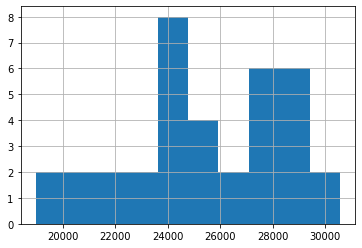

In [89]:
month_orders.hist()
plt.show()

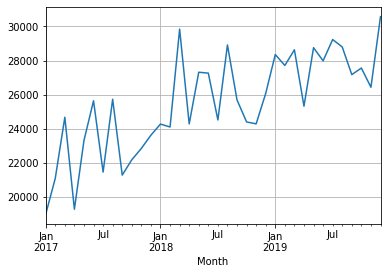

In [90]:
month_orders.plot()
plt.grid(True)

In [91]:
# we can clearly see the upwards trend in the data set
# Graph also depicts some SEASIONALITY trends, as we can see that:
#  - There is always a fall in total  sales at the beginning of the year.
#  - Also the sales increases in Feb and again decreases 

In [92]:
month_orders = pd.DataFrame(month_orders).reset_index()

In [93]:
month_orders.head()

,Month,Order
0,2017-01-01,18966
1,2017-02-01,21078
2,2017-03-01,24668
3,2017-04-01,19266
4,2017-05-01,23300


In [102]:
season = month_orders
season['Date'] = month_orders.Month
season['Year'] = month_orders.Month.dt.year
season['month'] = month_orders.Month.dt.month
spivot = pd.pivot_table(season, index='month', columns = 'Year', values = 'Order', aggfunc=np.mean)

In [103]:
month_orders.drop(['Date', 'Year', 'month'], axis = 1, inplace = True)
month_orders.head()

,Month,Order
0,2017-01-01,18966
1,2017-02-01,21078
2,2017-03-01,24668
3,2017-04-01,19266
4,2017-05-01,23300


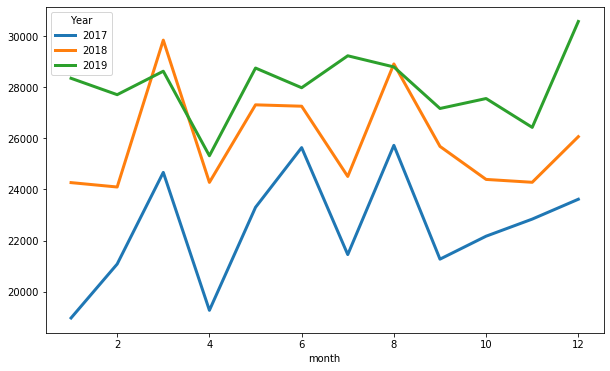

In [104]:
spivot.plot(figsize=(10,6), linewidth=3)
plt.show()

In [105]:
# from the above graph its clearly visible that there is the upward trend
# as the order count kept on increasing over the year

In [114]:
rolling_mean = month_orders.rolling(window = 2).mean()
rolling_std = month_orders.rolling(window = 2).std()

In [115]:
month_orders.head()

,Order
Month,
2017-01-01,18966
2017-02-01,21078
2017-03-01,24668
2017-04-01,19266
2017-05-01,23300


In [116]:
#month_orders = month_orders.set_index('Month')

KeyError: "None of ['Month'] are in the columns"

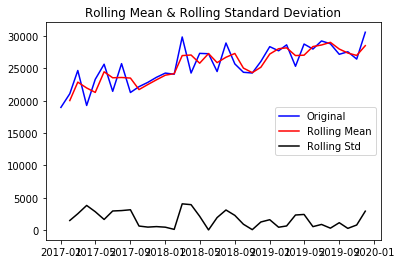

In [117]:
plt.plot(month_orders, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [118]:
# rolling mean and rolling std dev smoothens our data and do bring some
# stationarity to our data

In [119]:
rolling_mean2 = month_orders.rolling(window = 3).mean()
rolling_std2 = month_orders.rolling(window = 3).std()

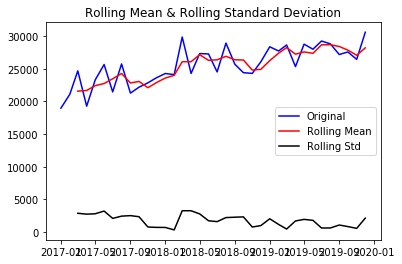

In [120]:
plt.plot(month_orders, color = 'blue', label = 'Original')
plt.plot(rolling_mean2, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std2, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

###### Ad fuller test for stationarity

In [121]:
from statsmodels.tsa.stattools import adfuller

In [122]:
result = adfuller(month_orders['Order'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.395508546974049
p-value: 0.5844274732972616
Critical Values:
	1%: -3.6996079738860943
	5%: -2.9764303469999494
	10%: -2.627601001371742


###### KPSS test 

In [123]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series):    
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(month_orders['Order'])

KPSS Statistic: 0.4610159555277874
p-value: 0.05085519158285027
num lags: 10
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


### Converting non stationary data into Stationary data

In [124]:
month_orders.head()

,Order
Month,
2017-01-01,18966
2017-02-01,21078
2017-03-01,24668
2017-04-01,19266
2017-05-01,23300


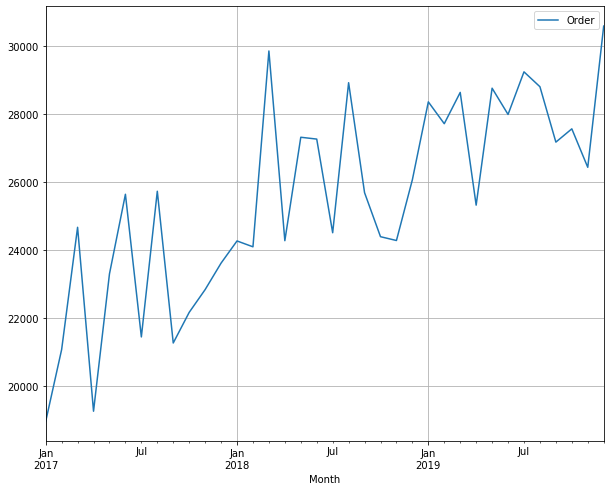

In [125]:
month_orders.plot(figsize=(10,8))
plt.grid()
plt.show()

###### 1st Shift

In [197]:
month_orders1 = month_orders.copy()

In [198]:
month_orders1.shape

(36, 1)

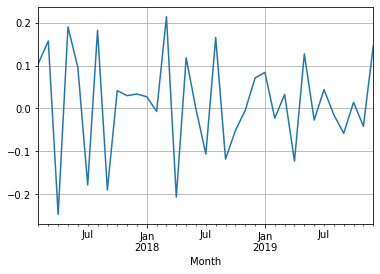

In [199]:
month_orders1['Order_lg'] = np.log(month_orders1['Order'])
month_orders1['Order_lg_df'] = month_orders1['Order_lg'] - month_orders1['Order_lg'].shift(1)
month_orders1['Order_lg_df'].dropna().plot()
plt.grid()

In [200]:
month_orders1.head(), month_orders1.shape

(            Order   Order_lg  Order_lg_df
 Month                                    
 2017-01-01  18966   9.850403          NaN
 2017-02-01  21078   9.955985     0.105582
 2017-03-01  24668  10.113262     0.157277
 2017-04-01  19266   9.866097    -0.247165
 2017-05-01  23300  10.056209     0.190111,
 (36, 3))

In [201]:
month_orders1 = month_orders1.reset_index()
month_orders1.head(), month_orders1.shape

(       Month  Order   Order_lg  Order_lg_df
 0 2017-01-01  18966   9.850403          NaN
 1 2017-02-01  21078   9.955985     0.105582
 2 2017-03-01  24668  10.113262     0.157277
 3 2017-04-01  19266   9.866097    -0.247165
 4 2017-05-01  23300  10.056209     0.190111,
 (36, 4))

In [202]:
season1 = month_orders1

In [203]:
season1.head()

,Month,Order,Order_lg,Order_lg_df
0,2017-01-01,18966,9.850403,NaN
1,2017-02-01,21078,9.955985,0.105582
2,2017-03-01,24668,10.113262,0.157277
3,2017-04-01,19266,9.866097,-0.247165
4,2017-05-01,23300,10.056209,0.190111


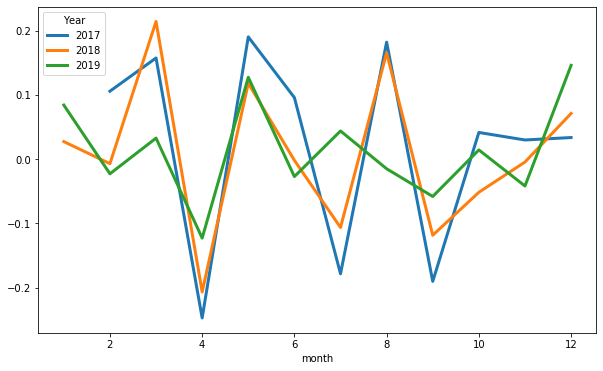

In [230]:
season1['Date'] = month_orders1.Month
season1['Year'] = month_orders1.Month.dt.year
season1['month'] = month_orders1.Month.dt.month
season1.dropna(inplace = True)
spivot = pd.pivot_table(season1, index='month', columns = 'Year', values = 'Order_lg_df', aggfunc=np.mean)
spivot.plot(figsize=(10,6), linewidth=3)
plt.show()

In [205]:
month_orders1 = month_orders1.set_index('Month')

In [206]:
month_orders1.drop(['Order','Order_lg','Date','Year','month'], axis = 1, inplace = True)

In [209]:
month_orders1.dropna().head()

,Order_lg_df
Month,
2017-02-01,0.105582
2017-03-01,0.157277
2017-04-01,-0.247165
2017-05-01,0.190111
2017-06-01,0.095622


In [212]:
result = adfuller(month_orders1['Order_lg_df'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.496727206629303
p-value: 0.00807154522613824
Critical Values:
	1%: -3.6996079738860943
	5%: -2.9764303469999494
	10%: -2.627601001371742


In [213]:
def kpss_test(series):    
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(month_orders1['Order_lg_df'].dropna())

KPSS Statistic: 0.19715527638426128
p-value: 0.1
num lags: 10
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


###### 2nd Shift

In [222]:
month_orders2 = month_orders.copy()

In [223]:
month_orders2.shape

(36, 1)

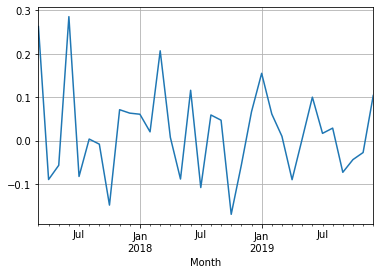

In [224]:
month_orders2['Order_lg'] = np.log(month_orders2['Order'])
month_orders2['Order_lg_df'] = month_orders2['Order_lg'] - month_orders2['Order_lg'].shift(2)
month_orders2['Order_lg_df'].dropna().plot()
plt.grid()

In [225]:
month_orders2 = month_orders2.reset_index()
month_orders2.head(), month_orders2.shape

(       Month  Order   Order_lg  Order_lg_df
 0 2017-01-01  18966   9.850403          NaN
 1 2017-02-01  21078   9.955985          NaN
 2 2017-03-01  24668  10.113262     0.262859
 3 2017-04-01  19266   9.866097    -0.089888
 4 2017-05-01  23300  10.056209    -0.057053,
 (36, 4))

In [226]:
season2 = month_orders2

In [227]:
season2.head()

,Month,Order,Order_lg,Order_lg_df
0,2017-01-01,18966,9.850403,NaN
1,2017-02-01,21078,9.955985,NaN
2,2017-03-01,24668,10.113262,0.262859
3,2017-04-01,19266,9.866097,-0.089888
4,2017-05-01,23300,10.056209,-0.057053


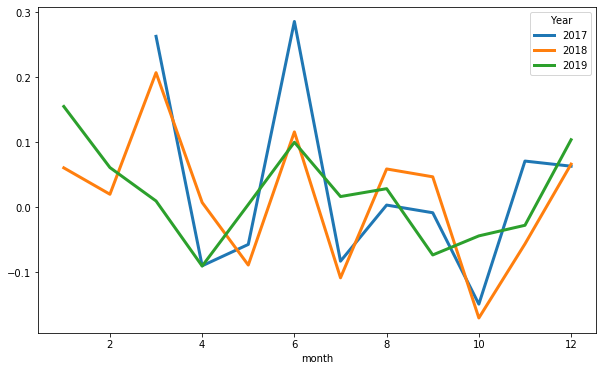

In [231]:
season2['Date'] = month_orders2.Month
season2['Year'] = month_orders2.Month.dt.year
season2['month'] = month_orders2.Month.dt.month
season1.dropna(inplace = True)
spivot = pd.pivot_table(season2, index='month', columns = 'Year', values = 'Order_lg_df', aggfunc=np.mean)
spivot.plot(figsize=(10,6), linewidth=3)
plt.show()

In [232]:
month_orders2 = month_orders2.set_index('Month')

In [234]:
month_orders2.drop(['Order','Order_lg','Date','Year','month'], axis = 1, inplace = True)

In [236]:
month_orders2.dropna().head()

,Order_lg_df
Month,
2017-03-01,0.262859
2017-04-01,-0.089888
2017-05-01,-0.057053
2017-06-01,0.285734
2017-07-01,-0.082822


In [237]:
result = adfuller(month_orders2['Order_lg_df'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.1037866464157005
p-value: 0.02627422587566269
Critical Values:
	1%: -3.7377092158564813
	5%: -2.9922162731481485
	10%: -2.635746736111111


In [238]:
def kpss_test(series):    
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(month_orders2['Order_lg_df'].dropna())

KPSS Statistic: 0.3580331125973205
p-value: 0.09524434801839633
num lags: 10
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


##### 3rd Shift

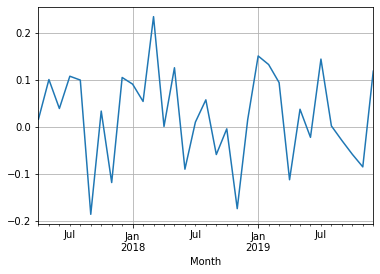

In [242]:
month_orders3 = month_orders.copy()
month_orders3.shape
month_orders3['Order_lg'] = np.log(month_orders3['Order'])
month_orders3['Order_lg_df'] = month_orders3['Order_lg'] - month_orders3['Order_lg'].shift(3)
month_orders3['Order_lg_df'].dropna().plot()
plt.grid()

In [243]:
month_orders3 = month_orders3.reset_index()
month_orders3.head(), month_orders3.shape

(       Month  Order   Order_lg  Order_lg_df
 0 2017-01-01  18966   9.850403          NaN
 1 2017-02-01  21078   9.955985          NaN
 2 2017-03-01  24668  10.113262          NaN
 3 2017-04-01  19266   9.866097     0.015694
 4 2017-05-01  23300  10.056209     0.100224,
 (36, 4))

In [244]:
season3 = month_orders3

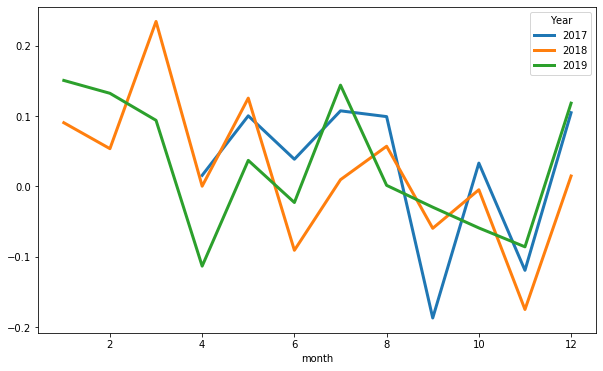

In [245]:
season3['Date'] = month_orders3.Month
season3['Year'] = month_orders3.Month.dt.year
season3['month'] = month_orders3.Month.dt.month
season3.dropna(inplace = True)
spivot = pd.pivot_table(season3, index='month', columns = 'Year', values = 'Order_lg_df', aggfunc=np.mean)
spivot.plot(figsize=(10,6), linewidth=3)
plt.show()

In [246]:
month_orders3 = month_orders3.set_index('Month')

In [247]:
month_orders3.drop(['Order','Order_lg','Date','Year','month'], axis = 1, inplace = True)

In [249]:
month_orders3.dropna().head()

,Order_lg_df
Month,
2017-04-01,0.015694
2017-05-01,0.100224
2017-06-01,0.038569
2017-07-01,0.107290
2017-08-01,0.099088


In [250]:
result = adfuller(month_orders3['Order_lg_df'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.4543036013111967
p-value: 0.009241222089179366
Critical Values:
	1%: -3.6996079738860943
	5%: -2.9764303469999494
	10%: -2.627601001371742


In [251]:
def kpss_test(series):    
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(month_orders3['Order_lg_df'].dropna())

KPSS Statistic: 0.33931064641976644
p-value: 0.1
num lags: 10
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [253]:
# I got the optimum result for stationarity at 1st shift
# so i will take 1st shift for my forecasting

### Forecasting

In [255]:
month_orders3 = month_orders1.dropna()

In [256]:
month_orders3.head()

,Month,Order_lg_df
1,2017-02-01,0.105582
2,2017-03-01,0.157277
3,2017-04-01,-0.247165
4,2017-05-01,0.190111
5,2017-06-01,0.095622


##### finding p and q value

E:\New folder (2)\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


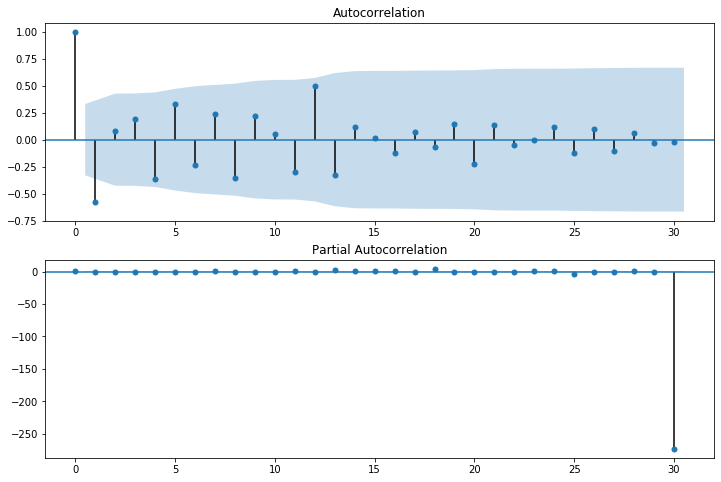

In [258]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(month_orders3['Order_lg_df'].values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(month_orders3['Order_lg_df'], lags=30, ax=ax2)

In [259]:
# I will take p = 2 and q = 1

##### Spliting the data

In [298]:
month_orders3 = month_orders3.set_index('Month')

In [299]:
month_orders3['Order_lg_df'].dropna()

Month
2017-02-01    0.105582
2017-03-01    0.157277
2017-04-01   -0.247165
2017-05-01    0.190111
2017-06-01    0.095622
2017-07-01   -0.178444
2017-08-01    0.181910
2017-09-01   -0.190243
2017-10-01    0.041397
2017-11-01    0.029731
2017-12-01    0.033499
2018-01-01    0.027193
2018-02-01   -0.007113
2018-03-01    0.214080
2018-04-01   -0.206637
2018-05-01    0.117916
2018-06-01   -0.001979
2018-07-01   -0.106384
2018-08-01    0.165361
2018-09-01   -0.118453
2018-10-01   -0.051652
2018-11-01   -0.004602
2018-12-01    0.071017
2019-01-01    0.084027
2019-02-01   -0.022868
2019-03-01    0.032626
2019-04-01   -0.122900
2019-05-01    0.127222
2019-06-01   -0.027180
2019-07-01    0.043735
2019-08-01   -0.015061
2019-09-01   -0.058158
2019-10-01    0.014252
2019-11-01   -0.041866
2019-12-01    0.145781
Name: Order_lg_df, dtype: float64

In [300]:
training_data=month_orders3['Order_lg_df'].dropna()[0:28]
test_data=month_orders3['Order_lg_df'].dropna()[28:]

In [301]:
training_data

Month
2017-02-01    0.105582
2017-03-01    0.157277
2017-04-01   -0.247165
2017-05-01    0.190111
2017-06-01    0.095622
2017-07-01   -0.178444
2017-08-01    0.181910
2017-09-01   -0.190243
2017-10-01    0.041397
2017-11-01    0.029731
2017-12-01    0.033499
2018-01-01    0.027193
2018-02-01   -0.007113
2018-03-01    0.214080
2018-04-01   -0.206637
2018-05-01    0.117916
2018-06-01   -0.001979
2018-07-01   -0.106384
2018-08-01    0.165361
2018-09-01   -0.118453
2018-10-01   -0.051652
2018-11-01   -0.004602
2018-12-01    0.071017
2019-01-01    0.084027
2019-02-01   -0.022868
2019-03-01    0.032626
2019-04-01   -0.122900
2019-05-01    0.127222
Name: Order_lg_df, dtype: float64

##### Importing ARIMA and ARMA

In [302]:
from statsmodels.tsa.arima_model import ARIMA, ARMA

##### ARIMA

In [303]:
# I will take p = 2, d = 1 and q = 1
arima1= ARIMA(np.asarray(training_data),order=(2,1,1))
model1=arima1.fit()

In [304]:
pred1= model1.forecast(steps=len(test_data))[0]

In [305]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_data,pred1)), mean_squared_error(test_data,pred1)

(0.07286478635757448, 0.005309277090934973)

In [306]:
# I will take p = 2, d = 1 and q = 0
arima2= ARIMA(np.asarray(training_data),order=(2,1,0))
model2=arima2.fit()
pred2= model2.forecast(steps=len(test_data))[0]
np.sqrt(mean_squared_error(test_data,pred2)), mean_squared_error(test_data,pred2)

(0.08772959600010354, 0.0076964820143413815)

In [307]:
# I will take p = 3, d = 1 and q = 0
arima3= ARIMA(np.asarray(training_data),order=(3,1,1))
model3=arima3.fit()
pred3= model3.forecast(steps=len(test_data))[0]
np.sqrt(mean_squared_error(test_data,pred3)), mean_squared_error(test_data,pred3)

(0.07899389839251246, 0.006240035983246584)

In [308]:
# I will take p = 2, d = 2 and q = 1
arima4= ARIMA(np.asarray(training_data),order=(2,2,1))
model4=arima4.fit()
pred4= model4.forecast(steps=len(test_data))[0]
np.sqrt(mean_squared_error(test_data,pred4)), mean_squared_error(test_data,pred4)

(0.08313177698327649, 0.006910892344397218)

In [309]:
# I will take p = 3, d = 3 and q = 1
arima5= ARIMA(np.asarray(training_data),order=(3,2,1))
model5=arima5.fit()
pred5= model5.forecast(steps=len(test_data))[0]
np.sqrt(mean_squared_error(test_data,pred5)), mean_squared_error(test_data,pred5)

(0.2613419196883266, 0.06829959898637974)

##### ARMA

In [319]:
arma1= ARMA(training_data,order=(2,1))
m1=arma1.fit()

E:\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [320]:
p1= m1.forecast(steps=len(test_data))[0]

In [321]:
np.sqrt(mean_squared_error(test_data,p1)), mean_squared_error(test_data,p1)

(0.10102315871457569, 0.010205678596670351)

In [323]:
arma2= ARMA(training_data,order=(3,1))
m2=arma2.fit()
p2= m2.forecast(steps=len(test_data))[0]
np.sqrt(mean_squared_error(test_data,p2)), mean_squared_error(test_data,p2)

E:\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(0.0996511775181702, 0.00993035718075787)

In [325]:
arma3= ARMA(training_data,order=(3,0))
m3=arma3.fit()
p3= m3.forecast(steps=len(test_data))[0]
np.sqrt(mean_squared_error(test_data,p3)), mean_squared_error(test_data,p3)

E:\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(0.07801946320572105, 0.0060870366389088595)

In [326]:
arma4= ARMA(training_data,order=(2,0))
m4=arma4.fit()
p4= m4.forecast(steps=len(test_data))[0]
np.sqrt(mean_squared_error(test_data,p4)), mean_squared_error(test_data,p4)

E:\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(0.07324962894637876, 0.0053655081407821695)

### Selecting Model: 
Best result is obtained from ARMA at p = 2 and q = 0
so, Model m1 is selected

Making prediction for Jan 2020, Feb 2020 and March 2020

In [327]:
predict_Jan_Feb_Mar_2020 = m4.forecast(steps=3)[0]

In [328]:
predict_Jan_Feb_Mar_2020

array([-0.02743325, -0.0181607 ,  0.05752019])

In [405]:
#function to trace back the actual order value from predicted shifted log 
#value

In [434]:
for i in range(3,len(month_orders3)):
    #print(i)
    prev = month_orders3['Order_lg'].iloc[i-3]
    cur_df = month_orders3['Order_lg_df'].iloc[i]
    curr = prev+cur_df
    print(round(np.exp(curr)), "->", curr)

19266.0 -> 9.86609716331757
23300.0 -> 10.056208639553791
25638.0 -> 10.15183090487208
21448.0 -> 9.973386679915794
25727.0 -> 10.155296303064102
21270.0 -> 9.965052908194282
22169.0 -> 10.006450195593953
22838.0 -> 10.036181094261593
23616.0 -> 10.0696797274002
24267.0 -> 10.096872681686062
24095.0 -> 10.089759629074432
29847.0 -> 10.30383961125747
24275.0 -> 10.097202293159526
27313.0 -> 10.215118058306537
27259.0 -> 10.21313902079189
24508.0 -> 10.106754873845546
28915.0 -> 10.272115770592318
25685.0 -> 10.153662442901368
24392.0 -> 10.10201048866809
24280.0 -> 10.097408245173435
26067.0 -> 10.168425425507316
28352.0 -> 10.252452853404808
27711.0 -> 10.22958472526072
28630.0 -> 10.262210398092162
25319.0 -> 10.13931038100741
28754.0 -> 10.266532166982538
27983.0 -> 10.239352461914338
29234.0 -> 10.283087694449238
28797.0 -> 10.268026494031647
27170.0 -> 10.209868702420394
27560.0 -> 10.224120725127595
26430.0 -> 10.182255007598334
30578.0 -> 10.32803607512056


# =================================== #

##### Quarter Data Forecast

In [414]:
df3.head()

,AccountNumber,Month,Order,ContactName,ContactProfessionalCategory,ContactCertificationDate,AvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable
0,1086390,2019-11-01,0,Dr. Branden Washington,GP,2018-01-01,Gold,C,No,San Ramon,California,AMS-US-WE,AMS-US-WE-NR,AMS-US-WE-NR-GP-SanRamon
1,1086390,2019-12-01,5,Dr. Branden Washington,GP,2018-01-01,Gold,C,No,San Ramon,California,AMS-US-WE,AMS-US-WE-NR,AMS-US-WE-NR-GP-SanRamon
2,1079261,2019-11-01,6,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire
3,1079261,2019-08-01,0,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire
4,1079261,2019-12-01,10,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire


In [415]:
qtr_data = df3.copy()

In [416]:
qtr_data.head()

,AccountNumber,Month,Order,ContactName,ContactProfessionalCategory,ContactCertificationDate,AvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable
0,1086390,2019-11-01,0,Dr. Branden Washington,GP,2018-01-01,Gold,C,No,San Ramon,California,AMS-US-WE,AMS-US-WE-NR,AMS-US-WE-NR-GP-SanRamon
1,1086390,2019-12-01,5,Dr. Branden Washington,GP,2018-01-01,Gold,C,No,San Ramon,California,AMS-US-WE,AMS-US-WE-NR,AMS-US-WE-NR-GP-SanRamon
2,1079261,2019-11-01,6,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire
3,1079261,2019-08-01,0,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire
4,1079261,2019-12-01,10,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire


In [417]:
qtr_data['Date'] = qtr_data.Month
qtr_data['Year'] = qtr_data.Month.dt.year
qtr_data['month'] = qtr_data.Month.dt.month

In [418]:
qtr_data.head()

,AccountNumber,Month,Order,ContactName,ContactProfessionalCategory,ContactCertificationDate,AvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable,Date,Year,month
0,1086390,2019-11-01,0,Dr. Branden Washington,GP,2018-01-01,Gold,C,No,San Ramon,California,AMS-US-WE,AMS-US-WE-NR,AMS-US-WE-NR-GP-SanRamon,2019-11-01,2019,11
1,1086390,2019-12-01,5,Dr. Branden Washington,GP,2018-01-01,Gold,C,No,San Ramon,California,AMS-US-WE,AMS-US-WE-NR,AMS-US-WE-NR-GP-SanRamon,2019-12-01,2019,12
2,1079261,2019-11-01,6,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire,2019-11-01,2019,11
3,1079261,2019-08-01,0,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire,2019-08-01,2019,8
4,1079261,2019-12-01,10,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire,2019-12-01,2019,12


In [419]:
conditions = [(qtr_data['month'] <= 3) & (qtr_data['Year'] == 2017),
    (qtr_data['month'] > 3) & (qtr_data['month'] <= 6) & (qtr_data['Year'] == 2017),
    (qtr_data['month'] > 6) & (qtr_data['month'] <= 9)& (qtr_data['Year'] == 2017),
    (qtr_data['month'] > 9)& (qtr_data['Year'] == 2017) ,(qtr_data['month'] <= 3)& (qtr_data['Year'] == 2018),
    (qtr_data['month'] > 3) & (qtr_data['month'] <= 6)& (qtr_data['Year'] == 2018),
    (qtr_data['month'] > 6) & (qtr_data['month'] <= 9)& (qtr_data['Year'] == 2018),
    (qtr_data['month'] > 9)& (qtr_data['Year'] == 2018) ,(qtr_data['month'] <= 3)& (qtr_data['Year'] == 2019),
    (qtr_data['month'] > 3) & (qtr_data['month'] <= 6)& (qtr_data['Year'] == 2019),
    (qtr_data['month'] > 6) & (qtr_data['month'] <= 9)& (qtr_data['Year'] == 2019),
    (qtr_data['month'] > 9)& (qtr_data['Year'] == 2019) 
    ]
#values = ['Q1_2017', 'Q2_2017', 'Q3_2017', 'Q4_2017', 'Q1_2018', 'Q2_2018', 'Q3_2018', 'Q4_2018', 'Q1_2019', 'Q2_2019', 'Q3_2019', 'Q4_2019']
values = ['01-03-2017', '01-06-2017', '01-09-2017', '01-12-2017','01-03-2018', '01-06-2018', '01-09-2018', '01-12-2018','01-03-2019', '01-06-2019', '01-09-2019', '01-12-2019']
qtr_data['Quarter'] = np.select(conditions, values)

In [420]:
qtr_data.head()

,AccountNumber,Month,Order,ContactName,ContactProfessionalCategory,ContactCertificationDate,AvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable,Date,Year,month,Quarter
0,1086390,2019-11-01,0,Dr. Branden Washington,GP,2018-01-01,Gold,C,No,San Ramon,California,AMS-US-WE,AMS-US-WE-NR,AMS-US-WE-NR-GP-SanRamon,2019-11-01,2019,11,01-12-2019
1,1086390,2019-12-01,5,Dr. Branden Washington,GP,2018-01-01,Gold,C,No,San Ramon,California,AMS-US-WE,AMS-US-WE-NR,AMS-US-WE-NR-GP-SanRamon,2019-12-01,2019,12,01-12-2019
2,1079261,2019-11-01,6,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire,2019-11-01,2019,11,01-12-2019
3,1079261,2019-08-01,0,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire,2019-08-01,2019,8,01-09-2019
4,1079261,2019-12-01,10,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire,2019-12-01,2019,12,01-12-2019


In [421]:
qtr_data = pd.DataFrame(qtr_data.groupby(['Quarter'])['Order'].sum())

In [462]:
qtr_data.head()

,Order
Quarter,
2017-01-03,63567
2017-01-06,66889
2017-01-09,67134
2017-01-12,67274
2018-01-03,76177


In [463]:
qtr_data.reset_index(inplace = True)

In [464]:
qtr_data['Quarter'] = pd.to_datetime(qtr_data['Quarter'])

In [465]:
qtr_data

,Quarter,Order
0,2017-01-03,63567
1,2017-01-06,66889
2,2017-01-09,67134
3,2017-01-12,67274
4,2018-01-03,76177
5,2018-01-06,77147
6,2018-01-09,77390
7,2018-01-12,73262
8,2019-01-03,82943
9,2019-01-06,80103


In [466]:
qtr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Quarter  12 non-null     datetime64[ns]
 1   Order    12 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 320.0 bytes


In [467]:
qtr_data = qtr_data.sort_values(by = 'Quarter')

In [468]:
qtr_data

,Quarter,Order
0,2017-01-03,63567
1,2017-01-06,66889
2,2017-01-09,67134
3,2017-01-12,67274
4,2018-01-03,76177
5,2018-01-06,77147
6,2018-01-09,77390
7,2018-01-12,73262
8,2019-01-03,82943
9,2019-01-06,80103


In [469]:
qtr_data = qtr_data.set_index('Quarter')

In [470]:
from statsmodels.tsa.stattools import adfuller

In [471]:
result = adfuller(qtr_data['Order'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.2125859640119503
p-value: 0.6681582497809107
Critical Values:
	1%: -4.9386902332361515
	5%: -3.477582857142857
	10%: -2.8438679591836733


In [472]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series):    
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(qtr_data['Order'])

KPSS Statistic: 0.39402575208821367
p-value: 0.0797302792723217
num lags: 8
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


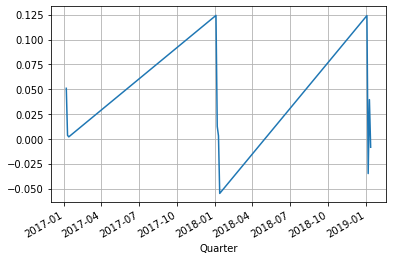

In [473]:
qtr_data1 = qtr_data.copy()
qtr_data1['Order_lg'] = np.log(qtr_data1['Order'])
qtr_data1['Order_lg_df'] = qtr_data1['Order_lg'] - qtr_data1['Order_lg'].shift(1)
qtr_data1['Order_lg_df'].dropna().plot()
plt.grid()

In [475]:
qtr_data1

,Order,Order_lg,Order_lg_df
Quarter,,,
2017-01-03,63567,11.059850,NaN
2017-01-06,66889,11.110790,0.050940
2017-01-09,67134,11.114446,0.003656
2017-01-12,67274,11.116529,0.002083
2018-01-03,76177,11.240815,0.124286
2018-01-06,77147,11.253468,0.012653
2018-01-09,77390,11.256613,0.003145
2018-01-12,73262,11.201797,-0.054816
2019-01-03,82943,11.325909,0.124112


In [476]:
qtr_data1 = qtr_data1.reset_index()
qtr_data1.head(), qtr_data1.shape

(     Quarter  Order   Order_lg  Order_lg_df
 0 2017-01-03  63567  11.059850          NaN
 1 2017-01-06  66889  11.110790     0.050940
 2 2017-01-09  67134  11.114446     0.003656
 3 2017-01-12  67274  11.116529     0.002083
 4 2018-01-03  76177  11.240815     0.124286,
 (12, 4))

In [477]:
qtr_data1.drop(['Order','Order_lg'], axis = 1, inplace = True)

In [478]:
qtr_data1.dropna().head()

,Quarter,Order_lg_df
1,2017-01-06,0.050940
2,2017-01-09,0.003656
3,2017-01-12,0.002083
4,2018-01-03,0.124286
5,2018-01-06,0.012653


In [479]:
result = adfuller(qtr_data1['Order_lg_df'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.1627422346961738
p-value: 0.689414310918847
Critical Values:
	1%: -4.9386902332361515
	5%: -3.477582857142857
	10%: -2.8438679591836733


In [480]:
def kpss_test(series):    
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(qtr_data1['Order_lg_df'].dropna())

KPSS Statistic: 0.37392970705408574
p-value: 0.08839236764910097
num lags: 7
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


,Order,Order_lg,Order_lg_df
Quarter,,,
2017-01-03,63567,11.059850,NaN
2017-01-06,66889,11.110790,NaN
2017-01-09,67134,11.114446,0.054596
2017-01-12,67274,11.116529,0.005739
2018-01-03,76177,11.240815,0.126369
2018-01-06,77147,11.253468,0.136939
2018-01-09,77390,11.256613,0.015798
2018-01-12,73262,11.201797,-0.051671
2019-01-03,82943,11.325909,0.069296


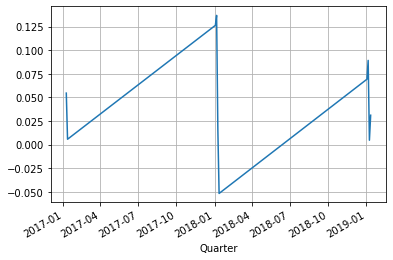

In [481]:
qtr_data2 = qtr_data.copy()
qtr_data2['Order_lg'] = np.log(qtr_data2['Order'])
qtr_data2['Order_lg_df'] = qtr_data2['Order_lg'] - qtr_data2['Order_lg'].shift(2)
qtr_data2['Order_lg_df'].dropna().plot()
plt.grid()
qtr_data2

In [482]:
qtr_data2.drop(['Order','Order_lg'], axis = 1, inplace = True)

In [483]:
qtr_data2.dropna().head()

,Order_lg_df
Quarter,
2017-01-09,0.054596
2017-01-12,0.005739
2018-01-03,0.126369
2018-01-06,0.136939
2018-01-09,0.015798


In [484]:
result = adfuller(qtr_data2['Order_lg_df'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.046758233714935
p-value: 0.0011845210343182015
Critical Values:
	1%: -4.6651863281249994
	5%: -3.3671868750000002
	10%: -2.802960625


In [485]:
def kpss_test(series):    
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(qtr_data2['Order_lg_df'].dropna())

KPSS Statistic: 0.4012738068862438
p-value: 0.07660611772144664
num lags: 7
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


,Order_lg_df
Quarter,
2017-01-12,0.056679
2018-01-03,0.130025
2018-01-06,0.139022
2018-01-09,0.140084
2018-01-12,-0.039018


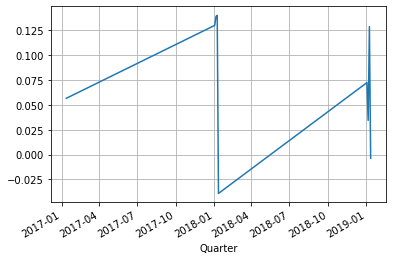

In [486]:
qtr_data3 = qtr_data.copy()
qtr_data3['Order_lg'] = np.log(qtr_data3['Order'])
qtr_data3['Order_lg_df'] = qtr_data3['Order_lg'] - qtr_data3['Order_lg'].shift(3)
qtr_data3['Order_lg_df'].dropna().plot()
plt.grid()
qtr_data3
qtr_data3.drop(['Order','Order_lg'], axis = 1, inplace = True)
qtr_data3.dropna().head()

In [487]:
result = adfuller(qtr_data3['Order_lg_df'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.8040652257180105
p-value: 0.05769542177024152
Critical Values:
	1%: -4.6651863281249994
	5%: -3.3671868750000002
	10%: -2.802960625


In [488]:
# Best stationarity is found at 2nd Shift

In [489]:
qtr_data2

,Order_lg_df
Quarter,
2017-01-03,NaN
2017-01-06,NaN
2017-01-09,0.054596
2017-01-12,0.005739
2018-01-03,0.126369
2018-01-06,0.136939
2018-01-09,0.015798
2018-01-12,-0.051671
2019-01-03,0.069296


In [492]:
qtr = qtr_data2.dropna()
qtr.reset_index(inplace = True)
qtr

,Quarter,Order_lg_df
0,2017-01-09,0.054596
1,2017-01-12,0.005739
2,2018-01-03,0.126369
3,2018-01-06,0.136939
4,2018-01-09,0.015798
5,2018-01-12,-0.051671
6,2019-01-03,0.069296
7,2019-01-06,0.089271
8,2019-01-09,0.004691
9,2019-01-12,0.031181


E:\New folder (2)\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


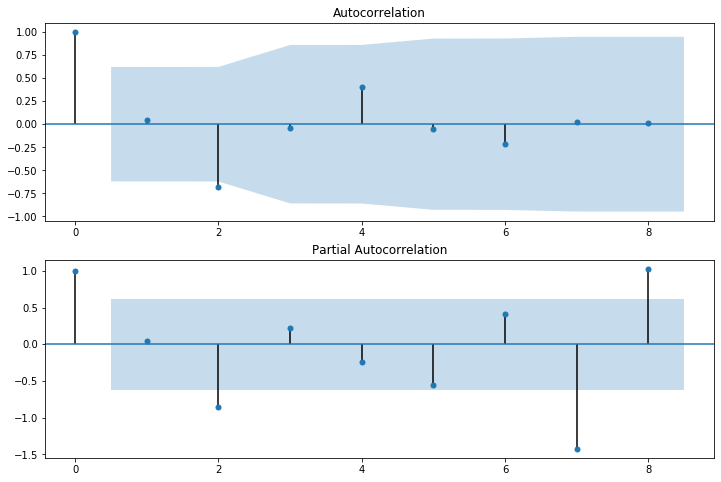

In [493]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(qtr['Order_lg_df'].values.squeeze(), lags=8, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(qtr['Order_lg_df'], lags=8, ax=ax2)

In [494]:
# I will take p = 1 and q = 1

In [495]:
qtr, len(qtr)

(     Quarter  Order_lg_df
 0 2017-01-09     0.054596
 1 2017-01-12     0.005739
 2 2018-01-03     0.126369
 3 2018-01-06     0.136939
 4 2018-01-09     0.015798
 5 2018-01-12    -0.051671
 6 2019-01-03     0.069296
 7 2019-01-06     0.089271
 8 2019-01-09     0.004691
 9 2019-01-12     0.031181,
 10)

In [497]:
training_data=qtr['Order_lg_df'].dropna()[0:8]
test_data=qtr['Order_lg_df'].dropna()[8:]

In [498]:
qtr

,Quarter,Order_lg_df
0,2017-01-09,0.054596
1,2017-01-12,0.005739
2,2018-01-03,0.126369
3,2018-01-06,0.136939
4,2018-01-09,0.015798
5,2018-01-12,-0.051671
6,2019-01-03,0.069296
7,2019-01-06,0.089271
8,2019-01-09,0.004691
9,2019-01-12,0.031181


In [499]:
x = training_data.values
x

array([ 0.05459615,  0.0057393 ,  0.12636896,  0.13693886,  0.01579799,
       -0.05167064,  0.06929605,  0.08927125])

In [500]:
ar1= ARIMA(x,order=(1,1,1))

In [501]:
ar1.fit()

ValueError: The model specification cannot be estimated. The model contains 6 regressors (0 trend, 0 seasonal, 6 lags) but after adjustment for hold_back and creation of the lags, there are only 1 data points available to estimate parameters.

In [502]:
arma1= ARMA(training_data,order=(1,1))

In [503]:
arma1.fit(disp = 1)

ValueError: The model specification cannot be estimated. The model contains 6 regressors (0 trend, 0 seasonal, 6 lags) but after adjustment for hold_back and creation of the lags, there are only 2 data points available to estimate parameters.

In [504]:
qtr_data.head()

,Order
Quarter,
2017-01-03,63567
2017-01-06,66889
2017-01-09,67134
2017-01-12,67274
2018-01-03,76177


# ================================= #

# Account State wise prediction

In [519]:
state_data = df3.copy()

In [520]:
state_data.head()

,AccountNumber,Month,Order,ContactName,ContactProfessionalCategory,ContactCertificationDate,AvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable
0,1086390,2019-11-01,0,Dr. Branden Washington,GP,2018-01-01,Gold,C,No,San Ramon,California,AMS-US-WE,AMS-US-WE-NR,AMS-US-WE-NR-GP-SanRamon
1,1086390,2019-12-01,5,Dr. Branden Washington,GP,2018-01-01,Gold,C,No,San Ramon,California,AMS-US-WE,AMS-US-WE-NR,AMS-US-WE-NR-GP-SanRamon
2,1079261,2019-11-01,6,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire
3,1079261,2019-08-01,0,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire
4,1079261,2019-12-01,10,Dr. Rey Mcdowell,GP,2019-07-22,Silver,C,No,houston,Texas,AMS-US-SW,AMS-US-SW-LS,AMS-US-SW-LS-GP-Bellaire


In [521]:
state_data = state_data.groupby(['AccountState', 'Month'])['Order'].sum()

In [524]:
state_data = pd.DataFrame(state_data)

In [525]:
state_data

Order
AccountState Month            
Alabama      2017-01-01    103
             2017-02-01    109
             2017-03-01    170
             2017-04-01    125
             2017-05-01    136
...                        ...
Wyoming      2019-08-01      5
             2019-09-01     10
             2019-10-01     12
             2019-11-01      3
             2019-12-01     13

[1851 rows x 1 columns]

In [528]:
state = df3['AccountState'].unique()
state

array(['California', 'Texas', 'District of Columbia', 'Florida',
       'Michigan', 'Indiana', 'Mississippi', 'Maryland', 'Washington',
       'North Carolina', 'Iowa', 'New Jersey', 'Nebraska', 'Colorado',
       'Virginia', 'Oklahoma', 'Missouri', 'Idaho', 'Georgia',
       'Massachusetts', 'Arkansas', 'Illinois', 'Hawaii', 'Kentucky',
       'New York', 'Delaware', 'South Carolina', 'Utah', 'Wisconsin',
       'Minnesota', 'Pennsylvania', 'Louisiana', 'Tennessee', 'Wyoming',
       'Alabama', 'Alaska', 'Arizona', 'Ohio', 'Connecticut', 'Oregon',
       'Nevada', 'South Dakota', 'New Mexico', 'New Hampshire', 'Montana',
       'West Virginia', 'North Dakota', 'Kansas', 'Vermont', 'Maine',
       'Rhode Island', 'ON'], dtype=object)

In [529]:
df3['AccountState'].nunique()

52

In [531]:
state1 = state_data.loc[state[0]]

In [533]:
state1.head()

,Order
Month,
2017-01-01,2513
2017-02-01,2687
2017-03-01,3307
2017-04-01,2575
2017-05-01,3051


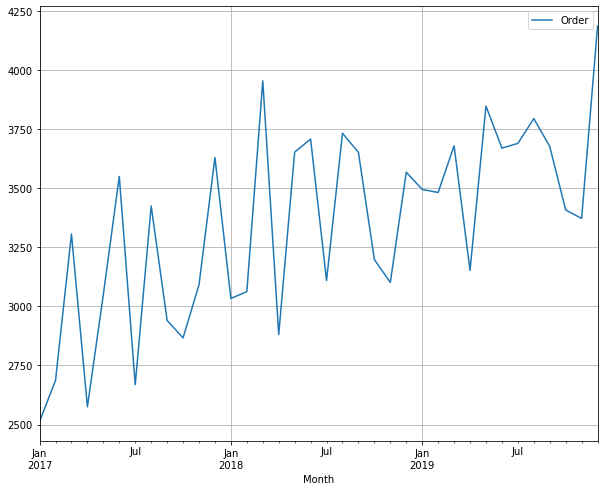

In [535]:
state1.plot(figsize=(10,8))
plt.grid()
plt.show()

In [534]:
sm.stats.durbin_watson(state1)

array([0.02216025])

#### shift 1

In [536]:
state11 = state1.copy()

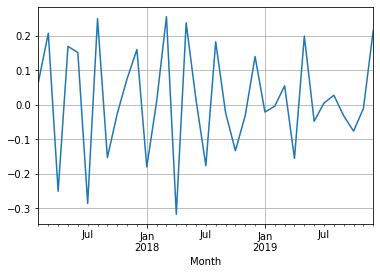

In [537]:
state11['Order_lg'] = np.log(state11['Order'])
state11['Order_lg_df'] = state11['Order_lg'] - state11['Order_lg'].shift(1)
state11['Order_lg_df'].dropna().plot()
plt.grid()

In [538]:
state11 = state11.reset_index()
state11.head(), state11.shape

(       Month  Order  Order_lg  Order_lg_df
 0 2017-01-01   2513  7.829233          NaN
 1 2017-02-01   2687  7.896181     0.066948
 2 2017-03-01   3307  8.103797     0.207616
 3 2017-04-01   2575  7.853605    -0.250192
 4 2017-05-01   3051  8.023225     0.169620,
 (36, 4))

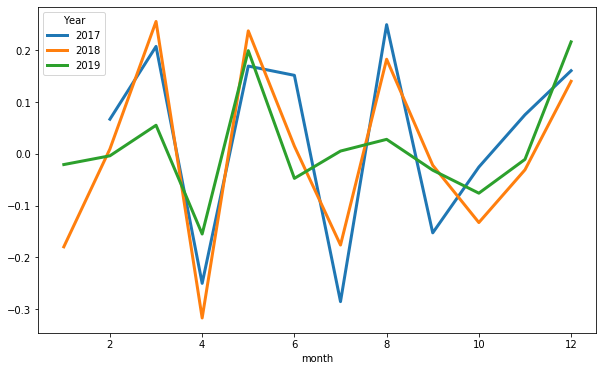

In [539]:
season1 = state11
season1['Date'] = state11.Month
season1['Year'] = state11.Month.dt.year
season1['month'] = state11.Month.dt.month
season1.dropna(inplace = True)
spivot = pd.pivot_table(season1, index='month', columns = 'Year', values = 'Order_lg_df', aggfunc=np.mean)
spivot.plot(figsize=(10,6), linewidth=3)
plt.show()

In [540]:
state11 = state11.set_index('Month')
state11.drop(['Order','Order_lg','Date','Year','month'], axis = 1, inplace = True)
state11.dropna().head()

,Order_lg_df
Month,
2017-02-01,0.066948
2017-03-01,0.207616
2017-04-01,-0.250192
2017-05-01,0.169620
2017-06-01,0.151760


In [541]:
result = adfuller(state11['Order_lg_df'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.7547014511846672
p-value: 0.06504132904954074
Critical Values:
	1%: -3.6996079738860943
	5%: -2.9764303469999494
	10%: -2.627601001371742


In [542]:
def kpss_test(series):    
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(state11['Order_lg_df'].dropna())

KPSS Statistic: 0.14922991088628848
p-value: 0.1
num lags: 10
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


##### 2nd Shift

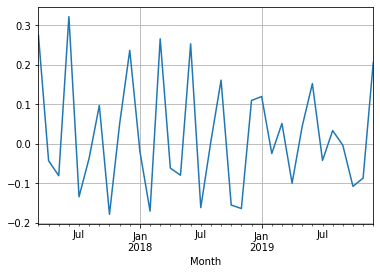

In [543]:
state12 = state1.copy()
state12['Order_lg'] = np.log(state12['Order'])
state12['Order_lg_df'] = state12['Order_lg'] - state12['Order_lg'].shift(2)
state12['Order_lg_df'].dropna().plot()
plt.grid()

In [544]:
state12

,Order,Order_lg,Order_lg_df
Month,,,
2017-01-01,2513,7.829233,NaN
2017-02-01,2687,7.896181,NaN
2017-03-01,3307,8.103797,0.274564
2017-04-01,2575,7.853605,-0.042576
2017-05-01,3051,8.023225,-0.080572
2017-06-01,3551,8.174985,0.321380
2017-07-01,2669,7.889459,-0.133766
2017-08-01,3426,8.139149,-0.035836
2017-09-01,2941,7.986505,0.097046


In [546]:
state12.drop(['Order','Order_lg'], axis = 1, inplace = True)

In [547]:
state12.dropna().head()

,Order_lg_df
Month,
2017-03-01,0.274564
2017-04-01,-0.042576
2017-05-01,-0.080572
2017-06-01,0.321380
2017-07-01,-0.133766


In [548]:
result = adfuller(state12['Order_lg_df'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.590371148045449
p-value: 0.0950037305825912
Critical Values:
	1%: -3.7377092158564813
	5%: -2.9922162731481485
	10%: -2.635746736111111


In [549]:
def kpss_test(series):    
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(state12['Order_lg_df'].dropna())

KPSS Statistic: 0.2556668539912943
p-value: 0.1
num lags: 10
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


##### 3rd Shift

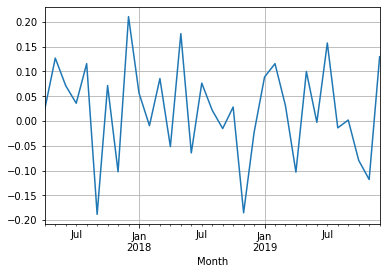

In [551]:
state13 = state1.copy()
state13.shape
state13['Order_lg'] = np.log(state13['Order'])
state13['Order_lg_df'] = state13['Order_lg'] - state13['Order_lg'].shift(3)
state13['Order_lg_df'].dropna().plot()
plt.grid()

In [553]:
state13.head()

,Order,Order_lg,Order_lg_df
Month,,,
2017-01-01,2513,7.829233,NaN
2017-02-01,2687,7.896181,NaN
2017-03-01,3307,8.103797,NaN
2017-04-01,2575,7.853605,0.024372
2017-05-01,3051,8.023225,0.127044


In [554]:
state13.drop(['Order','Order_lg'], axis = 1, inplace = True)

In [555]:
result = adfuller(state13['Order_lg_df'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.8287085163585854
p-value: 0.054288531051663626
Critical Values:
	1%: -3.6996079738860943
	5%: -2.9764303469999494
	10%: -2.627601001371742


In [556]:
def kpss_test(series):    
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(state13['Order_lg_df'].dropna())

KPSS Statistic: 0.3297731562176494
p-value: 0.1
num lags: 10
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
E:\New folder (2)\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


##### 4th shift

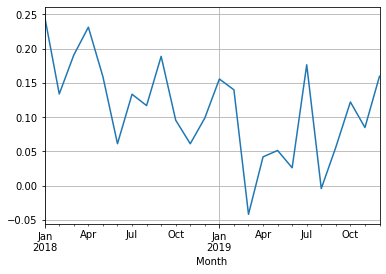

In [558]:
state14 = month_orders.copy()
state14.shape
state14['Order_lg'] = np.log(state14['Order'])
state14['Order_lg_df'] = state14['Order_lg'] - state14['Order_lg'].shift(12)
state14['Order_lg_df'].dropna().plot()
plt.grid()

##### 12th Shift

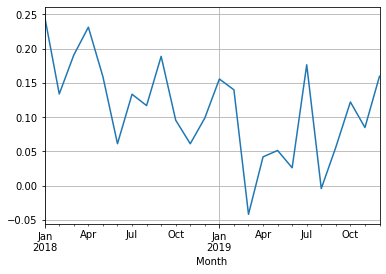

In [557]:
state123 = month_orders.copy()
state123.shape
state123['Order_lg'] = np.log(state123['Order'])
state123['Order_lg_df'] = state123['Order_lg'] - state123['Order_lg'].shift(12)
state123['Order_lg_df'].dropna().plot()
plt.grid()

In [559]:
#we are getting the best value at 1st shift, as the trend is almost removed

In [560]:
state11.head()

,Order_lg_df
Month,
2017-02-01,0.066948
2017-03-01,0.207616
2017-04-01,-0.250192
2017-05-01,0.169620
2017-06-01,0.151760


E:\New folder (2)\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


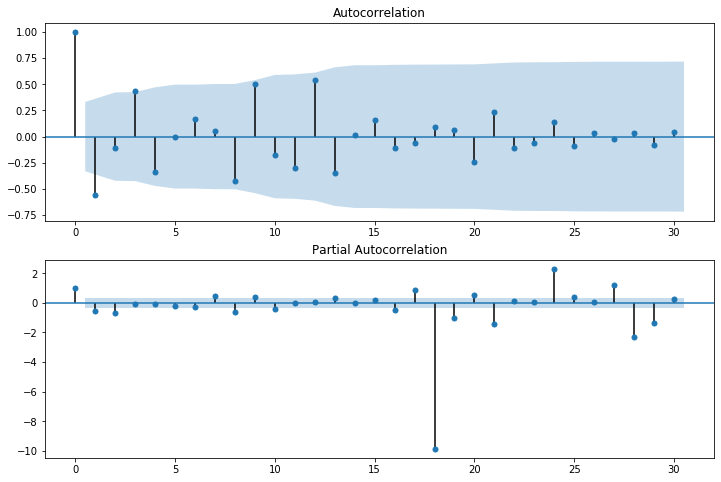

In [561]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(state11['Order_lg_df'].values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(state11['Order_lg_df'], lags=30, ax=ax2)

In [562]:
# I will take p = 2 and q = 3

In [565]:
state11.head(), len(state11)

(            Order_lg_df
 Month                  
 2017-02-01     0.066948
 2017-03-01     0.207616
 2017-04-01    -0.250192
 2017-05-01     0.169620
 2017-06-01     0.151760,
 35)

In [566]:
training_data=month_orders3['Order_lg_df'].dropna()[0:28]
test_data=month_orders3['Order_lg_df'].dropna()[28:]

In [567]:
# I will take p = 2, d = 1 and q = 3
arima1= ARIMA(np.asarray(training_data),order=(2,1,1))
model1=arima1.fit()

In [568]:
pred1= model1.forecast(steps=len(test_data))[0]

In [569]:
np.sqrt(mean_squared_error(test_data,pred1)), mean_squared_error(test_data,pred1)

(0.13591322847097378, 0.018472405673403115)

In [570]:
# I will take p = 2, d = 1 and q = 2
arima2= ARIMA(np.asarray(training_data),order=(2,1,0))
model2=arima2.fit()
pred2= model2.forecast(steps=len(test_data))[0]
np.sqrt(mean_squared_error(test_data,pred2)), mean_squared_error(test_data,pred2)

(0.11687607569154693, 0.013660017069056207)

In [573]:
# I will take p = 2, d = 2 and q = 1
arima4= ARIMA(np.asarray(training_data),order=(2,2,1))
model4=arima4.fit()
pred4= model4.forecast(steps=len(test_data))[0]
np.sqrt(mean_squared_error(test_data,pred4)), mean_squared_error(test_data,pred4)

(0.476373018135907, 0.22693125240791315)

In [586]:
arS1= ARMA(training_data,order=(2,1))
mS1=arS1.fit()

E:\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [587]:
pS1= mS1.forecast(steps=len(test_data))[0]

In [588]:
np.sqrt(mean_squared_error(test_data,pS1)), mean_squared_error(test_data,pS1)

(0.08620739801610451, 0.0074317154727070595)

##### Selecting the model and forcasting

In [580]:
#Best result is obtained from ARMA at p = 2 and q = 1 so, Model m1 is selected

#Making prediction for Jan 2020, Feb 2020 and March 2020

In [589]:
predict_state1_Jan_Feb_Mar_2020 = mS1.forecast(steps=3)[0]

In [590]:
predict_state1_Jan_Feb_Mar_2020

array([0.01476531, 0.05428729, 0.02200757])

In [591]:
#Similarly we can find the result for rest of the states

In [592]:
#and after the state wise forecasting we can similarly find the doctor wise
#sales

In [593]:
# we can also prepare a pipeline for the same